<a href="https://colab.research.google.com/github/AntVictorBN/Met-Num-Newton-DFP-e-BFGS/blob/main/TCC_Bacias_Atrac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bacias de atração do métodos de Newton, DFP e BFGS em função complexas

Abaixo temos os códicos e as imagens das Bacias de atração dos métodos de Newton, DFP e BFGS em relação as raizes da função complexa $h(z)=z^3-1$. Considerando $z=x+yi$, os valores de $x$ e $y$ das raizes de $h(z)$ são equivalentes aos resultados do seguinte sistema:

$$\left\{
  \begin{matrix}
  x^3-3xy^2-1 & = & 0 \\
  3x^2y-y^3 & = & 0 \\
  \end{matrix}
  \right.$$

Assim, focaremos em resolver o sistema acima. Para a criação dos gráficos, o valores das raizes de $h(z)$ já são conhecidos, sendo eles: $z_1 = -1/2 + (\sqrt{3}/2)i $, $z_2 = -1/2 + (-\sqrt{3}/2)i $ e $z_3 = 1 + 0i $. Para diferenciar as bacias de atração de cada raiz, cada uma recebeu uma cor, sendo $z_1$ a cor verde, $z_2$ a cor azul e $z_3$ a cor vermelha.

#### Bibliotecas Importantes

- Numpy - Será usado para a criação e operação com vetores e matrizes.
- matplotlib.pyplot - Será usado para a criação dos gráficos.

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

Seja a função $F:\mathbb{R}^2 →\mathbb{R}^2$ tal que

$$F(x,y) = (x^3-3xy^2-1,3x^2y-y^3)^T$$

Donde focaremos encontrar $x$ e $y$ tais que $F(x,y)=(0,0)^T$, ou seja, anula $F$.

In [ ]:
def F(x):
  return np.array([(x[0]**3)-3*x[0]*(x[1]**2)-1, 3*(x[0]**2)*x[1]-(x[1]**3)])

A função $dF(x,y)$ é a derivada da função $F(x,y)$, isto é,

$$dF(x,y)= \begin{bmatrix}
3x^2-3y^2 & -6xy \\
6xy & 3x^2-3y^2
\end{bmatrix}  $$

In [ ]:
def dF(x):
  return np.linalg.inv(np.array([[3*(x[0]**2)-3*(x[1]**2), -6*x[0]*x[1]], [6*x[0]*x[1], 3*(x[0]**2)-3*(x[1]**2)]]))

Criamos a função $norm(x)$ para calcular a norma dos pontos e da função, para o critério de comparação e o critério de parada e convergência.

In [ ]:
def norm(x):
  return np.linalg.norm(x)

- Criamos as listas de pontos $x$ e $y$ para as combinações de pontos que utilizaremos como valores iniciais nos algoritmos dos métodos e veremos para que resulatado de $F(x,y)=(0,0)^T$ cada ponto converge ou, em alguns casos, se o ponto diverge.

- A lista $x$ será os valores do eixo x (parte real) e a lista $y$ será os valores do eixo y (parte imaginária). Perceba que os valores de $x$ e $y$ variam no intervalo $[-2,2]$ com tamanho de passo $0.01$, ou seja, $x = y = \{-2,-1.99,-1.98, \cdots,1.98,1.99,2\}$.

- Já o valor de $m$ é a quantidade de elemento que temos na lista $x$, que no caso, é igual ao da lista $y$.

In [ ]:
x = np.arange(-2,2,0.01)
y = x
m = np.size(x)

Aqui temos vetores $z_1,z_2$ e $z_3$ tais que $F(z_1)=F(z_2)=F(z_3)=(0,0)^T$

In [ ]:
z1 = np.array([1,0])
z2 = np.array([-1/2,np.sqrt(3)/2])
z3 = np.array([-1/2,-np.sqrt(3)/2])

### Armazenar os dados para os gráficos

- Listas para guardar os dados de cada método, sendo separados por velocidade de convergência (Número de iterações) e pela a raiz que o ponto converge.

- As 5 primeiras listas guardarão os dados dos pontos que convergirem para a raiz $z_1$, que tem a cor Vermelha. Cada um receberá um tom de cor diferente de Vermelho em relação a sua velocidade de convergência, seguindo a ordem do mais claro (mais rápido) até o mais escuro (mais devagar).
- As outras 5 listas receberam os pontos que convergirem para a raiz $z_2$, que tem a cor Azul e tons diferentes de Azul, seguindo a mesma ideia.
- Já as 5 listas receberam os pontos que convergirem para a raiz $z_3$, que tem a cor Verde, e tons diferentes de Verde seguindo a mesma ideia.

### Observação:

- Em caso de pontos que não convergem, seja pelo número de iterações imposta ou por outro motivo, ele não será armazenado e no gráfico receberá a cor Branca para sinalizar isso.

#### Armazanar dados do Método de Newton

In [ ]:
# Raiz z1 / cor vermelha
xn1, yn1 = [], []
xn2, yn2 = [], []
xn3, yn3 = [], []
xn4, yn4 = [], []
xn5, yn5 = [], []

# Raiz z2 / cor Azul
xn6, yn6 = [], []
xn7, yn7 = [], []
xn8, yn8 = [], []
xn9, yn9 = [], []
xn10, yn10 = [], []

# Raiz z3 / cor verde
xn11, yn11 = [], []
xn12, yn12 = [], []
xn13, yn13 = [], []
xn14, yn14 = [], []
xn15, yn15 = [], []

#### Armazanar dados do Método DFP

In [ ]:
# Raiz z1 / cor vermelha
xd1, yd1 = [], []
xd2, yd2 = [], []
xd3, yd3 = [], []
xd4, yd4 = [], []
xd5, yd5 = [], []

# Raiz z2 / cor Azul
xd6, yd6 = [], []
xd7, yd7 = [], []
xd8, yd8 = [], []
xd9, yd9 = [], []
xd10, yd10 = [], []

# Raiz z3 / cor verde
xd11, yd11 = [], []
xd12, yd12 = [], []
xd13, yd13 = [], []
xd14, yd14 = [], []
xd15, yd15 = [], []

#### Armazanar dados do Método BFGS

In [ ]:
# Raiz z1 / cor vermelha
xb1, yb1 = [], []
xb2, yb2 = [], []
xb3, yb3 = [], []
xb4, yb4 = [], []
xb5, yb5 = [], []

# Raiz z2 / cor Azul
xb6, yb6 = [], []
xb7, yb7 = [], []
xb8, yb8 = [], []
xb9, yb9 = [], []
xb10, yb10 = [], []

# Raiz z3 / cor verde
xb11, yb11 = [], []
xb12, yb12 = [], []
xb13, yb13 = [], []
xb14, yb14 = [], []
xb15, yb15 = [], []

### Método de Newton

In [ ]:
for i in np.arange(1,m,1):
  for j in np.arange(1,m,1):
    xk = np.array([x[i],y[j]])
    if norm(xk)>0:
      for k in np.arange(0,100,1):

        xk = xk - dF(xk).dot(F(xk))

        if norm(F(xk)) < 10**(-8):
          v = [norm(xk - z1),norm(xk - z2),norm(xk - z3)]
          t = min(v)

          if t==v[0] and k<=4:
            xn1.append(x[i])
            yn1.append(y[j])
          if t==v[0] and 4<k and k<=8:
            xn2.append(x[i])
            yn2.append(y[j])
          if t==v[0] and 8<k and k<=12:
            xn3.append(x[i])
            yn3.append(y[j])
          if t==v[0] and 12<k and k<=16:
            xn4.append(x[i])
            yn4.append(y[j])
          if t==v[0] and 16<k:
            xn5.append(x[i])
            yn5.append(y[j])
          if t==v[1] and k<=4:
            xn6.append(x[i])
            yn6.append(y[j])
          if t==v[1] and 4<k and k<=8:
            xn7.append(x[i])
            yn7.append(y[j])
          if t==v[1] and 8<k and k<=12:
            xn8.append(x[i])
            yn8.append(y[j])
          if t==v[1] and 12<k and k<=16:
            xn9.append(x[i])
            yn9.append(y[j])
          if t==v[1] and 16<k:
            xn10.append(x[i])
            yn10.append(y[j])
          if t==v[2] and k<=4:
            xn11.append(x[i])
            yn11.append(y[j])
          if t==v[2] and 4<k and k<=8:
            xn12.append(x[i])
            yn12.append(y[j])
          if t==v[2] and 8<k and k<=12:
            xn13.append(x[i])
            yn13.append(y[j])
          if t==v[2] and 12<k and k<=16:
            xn14.append(x[i])
            yn14.append(y[j])
          if t==v[2] and 16<k:
            xn15.append(x[i])
            yn15.append(y[j])
          break

### Método DFP

In [ ]:
for i in np.arange(1,m,1):
  for j in np.arange(1,m,1):
    xk = np.array([x[i],y[j]])
    Hk = dF(xk)
    if norm(xk)>0:
      for k in np.arange(0,200,1):

        xp = xk - Hk.dot(F(xk))

        pk = np.array([xp - xk]).T
        qk = np.array([F(xp) - F(xk)]).T

        Hk = Hk + (pk @ pk.T) / (pk.T @ qk) - (Hk @ qk @ qk.T @ Hk) / (qk.T @ Hk @ qk)

        xk = xp

        if norm(F(xk)) < 10**(-8):
          v = [norm(xk - z1),norm(xk - z2),norm(xk - z3)]
          t = min(v)

          if t==v[0] and k<=4:
            xd1.append(x[i])
            yd1.append(y[j])
          if t==v[0] and 4<k and k<=8:
            xd2.append(x[i])
            yd2.append(y[j])
          if t==v[0] and 8<k and k<=12:
            xd3.append(x[i])
            yd3.append(y[j])
          if t==v[0] and 12<k and k<=16:
            xd4.append(x[i])
            yd4.append(y[j])
          if t==v[0] and 16<k:
            xd5.append(x[i])
            yd5.append(y[j])
          if t==v[1] and k<=4:
            xd6.append(x[i])
            yd6.append(y[j])
          if t==v[1] and 4<k and k<=8:
            xd7.append(x[i])
            yd7.append(y[j])
          if t==v[1] and 8<k and k<=12:
            xd8.append(x[i])
            yd8.append(y[j])
          if t==v[1] and 12<k and k<=16:
            xd9.append(x[i])
            yd9.append(y[j])
          if t==v[1] and 16<k:
            xd10.append(x[i])
            yd10.append(y[j])
          if t==v[2] and k<=4:
            xd11.append(x[i])
            yd11.append(y[j])
          if t==v[2] and 4<k and k<=8:
            xd12.append(x[i])
            yd12.append(y[j])
          if t==v[2] and 8<k and k<=12:
            xd13.append(x[i])
            yd13.append(y[j])
          if t==v[2] and 12<k and k<=16:
            xd14.append(x[i])
            yd14.append(y[j])
          if t==v[2] and 16<k:
            xd15.append(x[i])
            yd15.append(y[j])
          break

<ipython-input-15-5e1ca34ba588>:13: RuntimeWarning: divide by zero encountered in divide
  Hk = Hk + (pk @ pk.T) / (pk.T @ qk) - (Hk @ qk @ qk.T @ Hk) / (qk.T @ Hk @ qk)
<ipython-input-15-5e1ca34ba588>:13: RuntimeWarning: overflow encountered in matmul
  Hk = Hk + (pk @ pk.T) / (pk.T @ qk) - (Hk @ qk @ qk.T @ Hk) / (qk.T @ Hk @ qk)
<ipython-input-15-5e1ca34ba588>:13: RuntimeWarning: invalid value encountered in divide
  Hk = Hk + (pk @ pk.T) / (pk.T @ qk) - (Hk @ qk @ qk.T @ Hk) / (qk.T @ Hk @ qk)
<ipython-input-6-5f6055fcda49>:2: RuntimeWarning: overflow encountered in double_scalars
  return np.array([(x[0]**3)-3*x[0]*(x[1]**2)-1, 3*(x[0]**2)*x[1]-(x[1]**3)])
<ipython-input-6-5f6055fcda49>:2: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([(x[0]**3)-3*x[0]*(x[1]**2)-1, 3*(x[0]**2)*x[1]-(x[1]**3)])
<ipython-input-15-5e1ca34ba588>:13: RuntimeWarning: invalid value encountered in matmul
  Hk = Hk + (pk @ pk.T) / (pk.T @ qk) - (Hk @ qk @ qk.T @ Hk) / (qk.T 

### Método BFGS

In [ ]:
for i in np.arange(1,m,1):
  for j in np.arange(1,m,1):
    xk = np.array([x[i],y[j]])
    if norm(xk)>0:
      Hk = dF(xk)
      for k in np.arange(0,200,1):

        xp = xk - Hk.dot(F(xk))

        pk = np.array([xp - xk]).T
        qk = np.array([F(xp) - F(xk)]).T
        s = (1 / (pk.T @ qk))

        Hk = Hk + ((1+((qk.T @ Hk @ qk) * s )) * ((pk @ pk.T) * s)) - ((pk @ qk.T @ Hk) + (Hk @ qk @ pk.T))* s

        xk = xp

        if norm(F(xk)) < 10**(-8):
          v = [norm(xk - z1),norm(xk - z2),norm(xk - z3)]
          t = min(v)

          if t==v[0] and k<=4:
            xb1.append(x[i])
            yb1.append(y[j])
          if t==v[0] and 4<k and k<=8:
            xb2.append(x[i])
            yb2.append(y[j])
          if t==v[0] and 8<k and k<=12:
            xb3.append(x[i])
            yb3.append(y[j])
          if t==v[0] and 12<k and k<=16:
            xb4.append(x[i])
            yb4.append(y[j])
          if t==v[0] and 16<k:
            xb5.append(x[i])
            yb5.append(y[j])
          if t==v[1] and k<=4:
            xb6.append(x[i])
            yb6.append(y[j])
          if t==v[1] and 4<k and k<=8:
            xb7.append(x[i])
            yb7.append(y[j])
          if t==v[1] and 8<k and k<=12:
            xb8.append(x[i])
            yb8.append(y[j])
          if t==v[1] and 12<k and k<=16:
            xb9.append(x[i])
            yb9.append(y[j])
          if t==v[1] and 16<k:
            xb10.append(x[i])
            yb10.append(y[j])
          if t==v[2] and k<=4:
            xb11.append(x[i])
            yb11.append(y[j])
          if t==v[2] and 4<k and k<=8:
            xb12.append(x[i])
            yb12.append(y[j])
          if t==v[2] and 8<k and k<=12:
            xb13.append(x[i])
            yb13.append(y[j])
          if t==v[2] and 12<k and k<=16:
            xb14.append(x[i])
            yb14.append(y[j])
          if t==v[2] and 16<k:
            xb15.append(x[i])
            yb15.append(y[j])
          break

<ipython-input-16-776fec5f89d5>:12: RuntimeWarning: overflow encountered in matmul
  s = (1 / (pk.T @ qk))
<ipython-input-16-776fec5f89d5>:14: RuntimeWarning: overflow encountered in matmul
  Hk = Hk + ((1+((qk.T @ Hk @ qk) * s )) * ((pk @ pk.T) * s)) - ((pk @ qk.T @ Hk) + (Hk @ qk @ pk.T))* s
<ipython-input-16-776fec5f89d5>:14: RuntimeWarning: invalid value encountered in multiply
  Hk = Hk + ((1+((qk.T @ Hk @ qk) * s )) * ((pk @ pk.T) * s)) - ((pk @ qk.T @ Hk) + (Hk @ qk @ pk.T))* s
<ipython-input-6-5f6055fcda49>:2: RuntimeWarning: overflow encountered in double_scalars
  return np.array([(x[0]**3)-3*x[0]*(x[1]**2)-1, 3*(x[0]**2)*x[1]-(x[1]**3)])
<ipython-input-6-5f6055fcda49>:2: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([(x[0]**3)-3*x[0]*(x[1]**2)-1, 3*(x[0]**2)*x[1]-(x[1]**3)])
<ipython-input-16-776fec5f89d5>:14: RuntimeWarning: invalid value encountered in matmul
  Hk = Hk + ((1+((qk.T @ Hk @ qk) * s )) * ((pk @ pk.T) * s)) - ((pk @ qk.T @ Hk) +

### Gráficos

Abaixo temos os gráficos das bacias de tração de cada método.

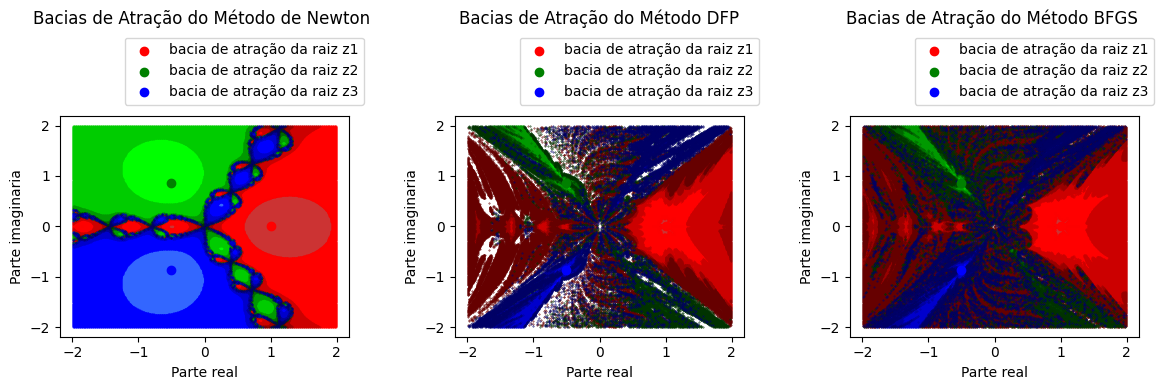

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].scatter(xn1,yn1,s =0.5,marker =".",color ='#CC3333')
axes[0].scatter(xn2,yn2,s =0.5,marker =".",color ='#FF0000')
axes[0].scatter(xn3,yn3,s =0.5,marker =".",color ='#CC0000')
axes[0].scatter(xn4,yn4,s =0.5,marker =".",color ='#990000')
axes[0].scatter(xn5,yn5,s =0.5,marker =".",color ='#660000')
axes[0].scatter(xn6,yn6,s =0.5,marker =".",color ='#00FF00')
axes[0].scatter(xn7,yn7,s =0.5,marker =".",color ='#00CC00')
axes[0].scatter(xn8,yn8,s =0.5,marker =".",color ='#009900')
axes[0].scatter(xn9,yn9,s =0.5,marker =".",color ='#006600')
axes[0].scatter(xn10,yn10,s =0.5,marker =".",color ='#003300')
axes[0].scatter(xn11,yn11,s =0.5,marker =".",color ='#3366FF')
axes[0].scatter(xn12,yn12,s =0.5,marker =".",color ='#0000FF')
axes[0].scatter(xn13,yn13,s =0.5,marker =".",color ='#0000CC')
axes[0].scatter(xn14,yn14,s =0.5,marker =".",color ='#000099')
axes[0].scatter(xn15,yn15,s =0.5,marker =".",color ='#000066')

axes[0].scatter(z1[0],z1[1], label ='bacia de atração da raiz z1',marker ="o",color ='red')
axes[0].scatter(z2[0],z2[1], label ='bacia de atração da raiz z2',marker ="o",color ='green')
axes[0].scatter(z3[0],z3[1], label ='bacia de atração da raiz z3',marker ="o",color ='blue')
axes[0].set_title('Bacias de Atração do Método de Newton \n \n \n \n')
axes[0].legend(ncol =1,bbox_to_anchor =(0.2,1.02))
axes[0].set_xlabel('Parte real')
axes[0].set_ylabel('Parte imaginaria')

axes[1].scatter(xd1,yd1,s =0.5,marker =".",color ='#CC3333')
axes[1].scatter(xd2,yd2,s =0.5,marker =".",color ='#FF0000')
axes[1].scatter(xd3,yd3,s =0.5,marker =".",color ='#CC0000')
axes[1].scatter(xd4,yd4,s =0.5,marker =".",color ='#990000')
axes[1].scatter(xd5,yd5,s =0.5,marker =".",color ='#660000')
axes[1].scatter(xd6,yd6,s =0.5,marker =".",color ='#00FF00')
axes[1].scatter(xd7,yd7,s =0.5,marker =".",color ='#00CC00')
axes[1].scatter(xd8,yd8,s =0.5,marker =".",color ='#009900')
axes[1].scatter(xd9,yd9,s =0.5,marker =".",color ='#006600')
axes[1].scatter(xd10,yd10,s =0.5,marker =".",color ='#003300')
axes[1].scatter(xd11,yd11,s =0.5,marker =".",color ='#3366FF')
axes[1].scatter(xd12,yd12,s =0.5,marker =".",color ='#0000FF')
axes[1].scatter(xd13,yd13,s =0.5,marker =".",color ='#0000CC')
axes[1].scatter(xd14,yd14,s =0.5,marker =".",color ='#000099')
axes[1].scatter(xd15,yd15,s =0.5,marker =".",color ='#000066')

axes[1].scatter(z1[0],z1[1], label ='bacia de atração da raiz z1',marker ="o",color ='red')
axes[1].scatter(z2[0],z2[1], label ='bacia de atração da raiz z2',marker ="o",color ='green')
axes[1].scatter(z3[0],z3[1], label ='bacia de atração da raiz z3',marker ="o",color ='blue')
axes[1].set_title('Bacias de Atração do Método DFP\n \n \n \n')
axes[1].legend(ncol =1,bbox_to_anchor =(0.2,1.02))
axes[1].set_xlabel('Parte real')
axes[1].set_ylabel('Parte imaginaria')

axes[2].scatter(xb1,yb1,s =0.5,marker =".",color ='#CC3333')
axes[2].scatter(xb2,yb2,s =0.5,marker =".",color ='#FF0000')
axes[2].scatter(xb3,yb3,s =0.5,marker =".",color ='#CC0000')
axes[2].scatter(xb4,yb4,s =0.5,marker =".",color ='#990000')
axes[2].scatter(xb5,yb5,s =0.5,marker =".",color ='#660000')
axes[2].scatter(xb6,yb6,s =0.5,marker =".",color ='#00FF00')
axes[2].scatter(xb7,yb7,s =0.5,marker =".",color ='#00CC00')
axes[2].scatter(xb8,yb8,s =0.5,marker =".",color ='#009900')
axes[2].scatter(xb9,yb9,s =0.5,marker =".",color ='#006600')
axes[2].scatter(xb10,yb10,s =0.5,marker =".",color ='#003300')
axes[2].scatter(xb11,yb11,s =0.5,marker =".",color ='#3366FF')
axes[2].scatter(xb12,yb12,s =0.5,marker =".",color ='#0000FF')
axes[2].scatter(xb13,yb13,s =0.5,marker =".",color ='#0000CC')
axes[2].scatter(xb14,yb14,s =0.5,marker =".",color ='#000099')
axes[2].scatter(xb15,yb15,s =0.5,marker =".",color ='#000066')

axes[2].scatter(z1[0],z1[1], label ='bacia de atração da raiz z1',marker ="o",color ='red')
axes[2].scatter(z2[0],z2[1], label ='bacia de atração da raiz z2',marker ="o",color ='green')
axes[2].scatter(z3[0],z3[1], label ='bacia de atração da raiz z3',marker ="o",color ='blue')
axes[2].set_title('Bacias de Atração do Método BFGS \n \n \n \n')
axes[2].legend(ncol =1,bbox_to_anchor =(0.2,1.02))
axes[2].set_xlabel('Parte real')
axes[2].set_ylabel('Parte imaginaria')

fig.tight_layout()